In [2]:
%pylab
%matplotlib inline

import pandas as pd
import pickle
from pathlib import Path as path
from tqdm.notebook import tqdm
import warnings
import datetime
from collections import defaultdict
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
DATA_DIR = path(r'E:\workspace\2004_ShortSessionRec\data')
with open(DATA_DIR/'session.pkl', 'rb') as f:
    dfr = pickle.load(f)
with open(DATA_DIR/'network.pkl', 'rb') as f:
    dfn = pickle.load(f)
datas = list(dfr.keys())

In [4]:
data = 'gowalla'
df = dfr[data]
gs = df.groupby('sessionId')
df['session_len'] = df.groupby('sessionId').sessionId.transform('size')

,user,item,timestamp,sessionId,session_len
8,0,153505,1286899040,0_11,2
9,0,420315,1286896743,0_11,2
11,0,16907,1286828480,0_10,2
12,0,12973,1286828442,0_10,2
14,0,260957,1286748037,0_9,2
...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2
6442871,196578,467635,1276270978,196578_0,4
6442873,196578,797460,1276270940,196578_0,4
6442887,196578,906885,1276263146,196578_0,4


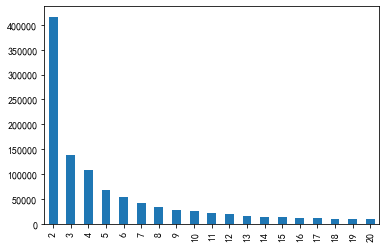

In [4]:
df.session_len.value_counts().sort_index().plot(kind='bar')

In [5]:
df['session_start'] = gs.timestamp.transform('min')
df['session_end'] = gs.timestamp.transform('max')
df

,user,item,timestamp,sessionId,session_len,session_start,session_end
8,0,153505,1286899040,0_11,2,1286896743,1286899040
9,0,420315,1286896743,0_11,2,1286896743,1286899040
11,0,16907,1286828480,0_10,2,1286828442,1286828480
12,0,12973,1286828442,0_10,2,1286828442,1286828480
14,0,260957,1286748037,0_9,2,1286745434,1286748037
...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978


In [6]:
def last_sid(sid):
    uid,csid = sid.split('_')
    return uid+'_'+str(int(csid)-1)
df['last_sessionId']=df.sessionId.apply(last_sid)
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8
...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1


In [7]:
df['last_session_endtime']=df.last_sessionId.map(df.groupby('sessionId').session_end.max())
df['idle_time'] = df.session_start - df.last_session_endtime
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId,last_session_endtime,idle_time
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8,1.286663e+09,82207.0
...,...,...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0,1.276271e+09,68660.0
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN


In [8]:
len_idle = df[['sessionId','session_len','idle_time']].drop_duplicates()
len_idle

,sessionId,session_len,idle_time
8,0_11,2,68263.0
11,0_10,2,80405.0
14,0_9,2,82207.0
18,0_8,4,83806.0
24,0_7,4,77714.0
...,...,...,...
6442821,196561_2,2,155072.0
6442831,196561_1,4,66532.0
6442836,196561_0,2,NaN
6442866,196578_1,2,68660.0


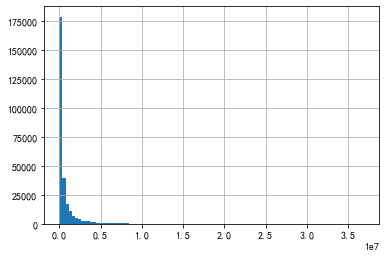

In [48]:
len_idle.idle_time.hist(bins=100)

In [9]:
usr_slen = df[['user','sessionId','session_len']].drop_duplicates()
usr_slen

,user,sessionId,session_len
8,0,0_11,2
11,0,0_10,2
14,0,0_9,2
18,0,0_8,4
24,0,0_7,4
...,...,...,...
6442821,196561,196561_2,2
6442831,196561,196561_1,4
6442836,196561,196561_0,2
6442866,196578,196578_1,2


In [10]:
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId,last_session_endtime,idle_time
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8,1.286663e+09,82207.0
...,...,...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0,1.276271e+09,68660.0
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN


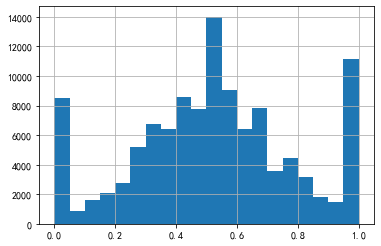

In [27]:
t=df.groupby('sessionId').apply(lambda x: x.timestamp.argsort())
df['session_itmidx'] = t.reset_index(level=0).rename(columns={'timestamp':'session_itmidx'}).session_itmidx
df['session_rel_itmidx']=df['session_itmidx']/(df['session_len']-1)
df.groupby('item').session_rel_itmidx.mean().hist(bins=20)

有些item只做session的开始，有些只做session的结束

In [30]:
df['item_count'] = df.groupby('item').item.transform('size')
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId,last_session_endtime,idle_time,session_len_group,session_itmidx,session_rel_itmidx,item_count
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0,0,1,1.000000,191
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0,0,0,0.000000,548
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0,0,1,1.000000,113
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0,0,0,0.000000,111
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8,1.286663e+09,82207.0,0,1,1.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0,1.276271e+09,68660.0,0,0,0.000000,10
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0,3,1.000000,10
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0,2,0.666667,18
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0,1,0.333333,11


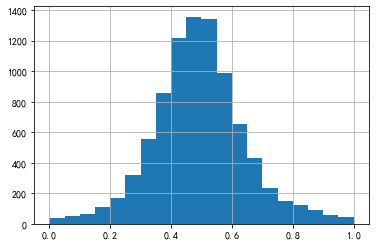

In [39]:
df[df.item_count>20].groupby('item').session_rel_itmidx.mean().hist(bins=20)

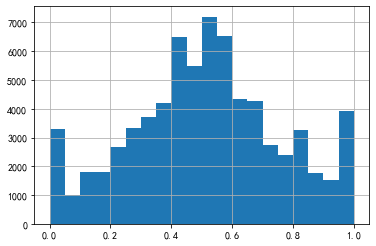

In [29]:
df[df.session_len>5].groupby('item').session_rel_itmidx.mean().hist(bins=20)

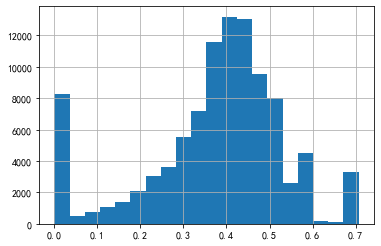

In [33]:
df.groupby('item').session_rel_itmidx.std().hist(bins=20)

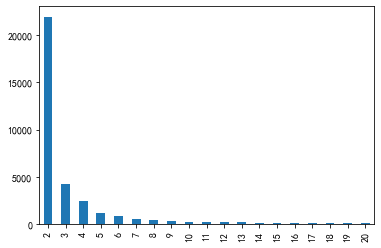

In [15]:
mean_idx = df.groupby('item').session_rel_itmidx.mean()
df[df.item.isin(list(mean_idx[mean_idx>0.9].index))].session_len.value_counts().sort_index().plot(kind='bar')

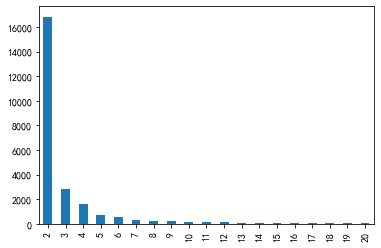

In [16]:
# mean_idx = df.groupby('item').session_rel_itmidx.mean()
df[df.item.isin(list(mean_idx[mean_idx<0.1].index))].session_len.value_counts().sort_index().plot(kind='bar')

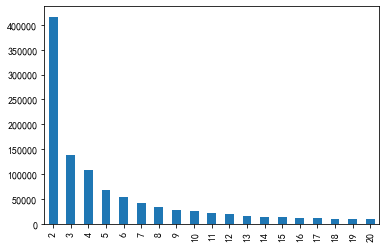

In [17]:
df[df.item.isin(list(mean_idx[mean_idx>0.4].index))|df.item.isin(list(mean_idx[mean_idx<0.6].index))].session_len.value_counts().sort_index().plot(kind='bar')

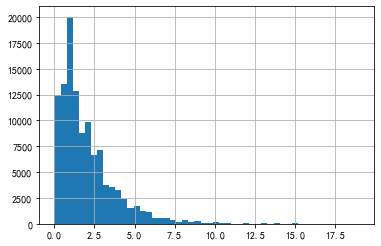

In [18]:
df.groupby('item').session_itmidx.mean().hist(bins=50)

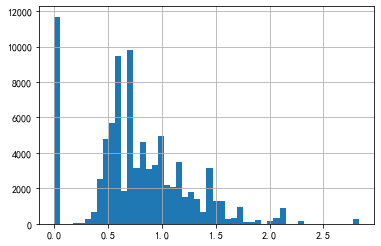

In [35]:
df[df.session_len<=5].groupby('item').session_itmidx.std().hist(bins=50)

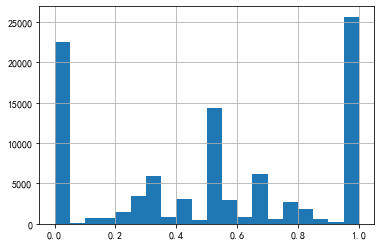

In [45]:
df[df.session_len==2].groupby('item').session_itmidx.mean().hist(bins=20)

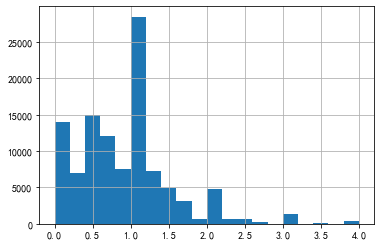

In [20]:
df[df.session_len<=5].groupby('item').session_itmidx.mean().hist(bins=20)

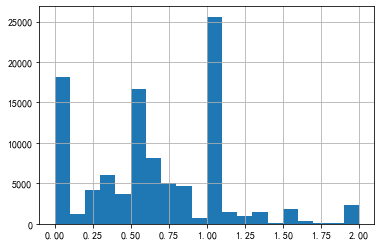

In [21]:
df[df.session_len<=3].groupby('item').session_itmidx.mean().hist(bins=20)

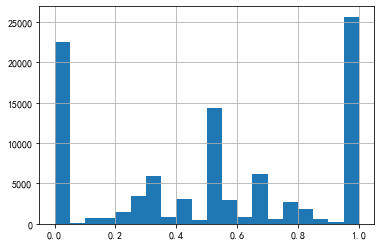

In [22]:
df[df.session_len<=2].groupby('item').session_itmidx.mean().hist(bins=20)

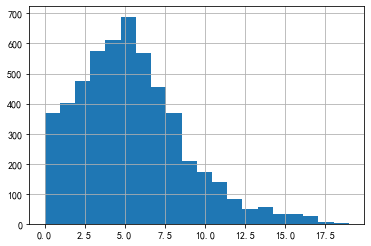

In [23]:
df[~df.item.isin(set(df[df.session_len<=5].item.unique()))].groupby('item').session_itmidx.mean().hist(bins=20)

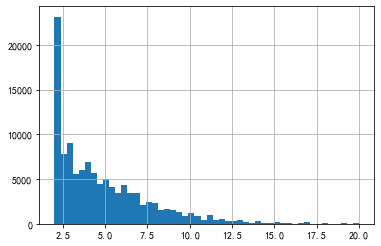

In [24]:
# 不同item是否更倾向于长/短session
df.groupby('item').session_len.mean().hist(bins=50)

有些item只出现在短session里，有些item只出现在长session

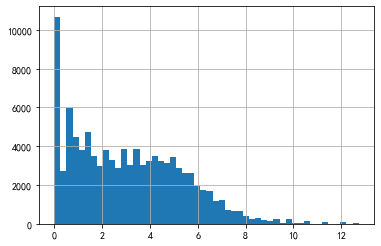

In [32]:
# 不同item是否更倾向于长/短session
df.groupby('item').session_len.std().hist(bins=50)

In [8]:
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId,last_session_endtime,idle_time
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8,1.286663e+09,82207.0
...,...,...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0,1.276271e+09,68660.0
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN


In [9]:
df.groupby(['item','session_len']).item.size()

item     session_len
8904     2               1
         3               2
         7               1
8932     2               4
         3               1
                        ..
5838873  2              10
         3               2
         5               1
         6               1
         18              1
Name: item, Length: 436955, dtype: int64

In [26]:
mp = pd.Series([0 if i<=5 else 1 for i in range(1,21)], index = list(range(1,21)))

df['session_len_group'] = df.session_len.map(mp)
df

,user,item,timestamp,sessionId,session_len,session_start,session_end,last_sessionId,last_session_endtime,idle_time,session_len_group
8,0,153505,1286899040,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0,0
9,0,420315,1286896743,0_11,2,1286896743,1286899040,0_10,1.286828e+09,68263.0,0
11,0,16907,1286828480,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0,0
12,0,12973,1286828442,0_10,2,1286828442,1286828480,0_9,1.286748e+09,80405.0,0
14,0,260957,1286748037,0_9,2,1286745434,1286748037,0_8,1.286663e+09,82207.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6442867,196578,1160482,1276339638,196578_1,2,1276339638,1276341536,196578_0,1.276271e+09,68660.0,0
6442871,196578,467635,1276270978,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0
6442873,196578,797460,1276270940,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0
6442887,196578,906885,1276263146,196578_0,4,1276262794,1276270978,196578_-1,NaN,NaN,0


In [40]:
df[df.item_count>20].groupby(['item','session_len']).item.size()

item     session_len
8938     2              12
         3               5
         5               2
         7               1
         9               1
                        ..
5535878  9               4
         13              1
         15              1
         18              1
         20              1
Name: item, Length: 86699, dtype: int64